In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.nonparametric.smoothers_lowess import lowess
from collections import Counter
import time

In [2]:
guess_exercise_df = pd.read_csv("data.csv")

In [3]:
guess_exercise_df

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2)
0,0.004,0.1925,-0.1423,0.0988,0.259
1,0.004,0.5429,0.1905,0.7809,0.970
2,0.011,0.5640,0.2657,1.4413,1.570
3,0.021,0.6467,0.2393,1.8608,1.984
4,0.030,0.5739,0.0895,1.8543,1.943
...,...,...,...,...,...
10682,103.287,-1.0166,-0.2371,-0.9416,1.406
10683,103.301,-0.5683,-0.2958,-2.2874,2.375
10684,103.309,-0.4664,0.0366,-1.6100,1.677
10685,103.319,-0.8944,-0.2493,-0.6153,1.114


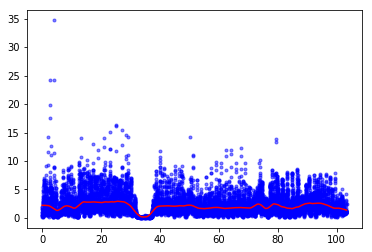

In [4]:
plt.plot(guess_exercise_df['time'], guess_exercise_df['aT (m/s^2)'], 'b.', alpha=0.5)
loess_smoothed = lowess(guess_exercise_df['aT (m/s^2)'],guess_exercise_df['time'], frac=0.05)
plt.plot(guess_exercise_df['time'], loess_smoothed[:, 1], 'r-')